In [62]:
import sqlite3
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as plt
from datetime import date

In [10]:
connection = sqlite3.connect('Northwind_small.sqlite')
cursor = connection.cursor()

In [11]:
def sql_select_to_df(SQL_COMMAND, cursor=cursor):
    """returns output of SQL command in dataframe format"""
    results = cursor.execute(SQL_COMMAND).fetchall()
    df = pd.DataFrame(results)
    df.columns = [i[0] for i in cursor.description]
    return df

In [12]:
sql_select_to_df("""select * from OrderDetail;""")

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
5,10250/41,10250,41,7.70,10,0.00
6,10250/51,10250,51,42.40,35,0.15
7,10250/65,10250,65,16.80,15,0.15
8,10251/22,10251,22,16.80,6,0.05
9,10251/57,10251,57,15.60,15,0.05


In [26]:
orders_employees_df = sql_select_to_df("""SELECT *
                                FROM [Employee] AS E
                                JOIN [Order] AS O
                                ON O.EmployeeId = E.Id
                                JOIN [OrderDetail] AS OD
                                ON O.ID = OD.OrderID
                        """)

pd.set_option('display.max_columns', 500)
orders_employees_df = orders_employees_df.loc[:,~orders_employees_df.columns.duplicated()]
discounts = list(orders_employees_df.Discount.values)

def get_discount_multiplier(discount):
    newlist = []
    
    for d in discount:
        newlist.append(1-d)
    
    return newlist

discount_multipliers = get_discount_multiplier(discounts)
discount_multipliers
orders_employees_df['DiscountMultiplier'] = discount_multipliers

#orders_employees_df['DiscountMultiplier'] = orders_employees_df['Quantity'] * orders_employees_df['']
orders_employees_df['DiscountedPrice'] = orders_employees_df.UnitPrice.values * orders_employees_df.DiscountMultiplier.values

orders_employees_df['Revenue']

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderId,ProductId,UnitPrice,Quantity,Discount,DiscountMultiplier,DiscountedPrice
0,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248,11,14.00,12,0.00,1.00,14.0000
1,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248,42,9.80,10,0.00,1.00,9.8000
2,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248,72,34.80,5,0.00,1.00,34.8000
3,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249,14,18.60,9,0.00,1.00,18.6000
4,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249,51,42.40,40,0.00,1.00,42.4000
5,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,10250,41,7.70,10,0.00,1.00,7.7000
6,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,10250,51,42.40,35,0.15,0.85,36.0400
7,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,10250,65,16.80,15,0.15,0.85,14.2800
8,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,10251,22,16.80,6,0.05,0.95,15.9600
9,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Bl

In [81]:
nows = ['2019-06-17','2019-06-17','2019-06-17','2019-06-17','2019-06-17','2019-06-17','2019-06-17','2019-06-17','2019-06-17']

In [93]:
employees = sql_select_to_df("""select * from Employee;""")
employees = employees[['Id','LastName','FirstName','BirthDate']]


employees['BirthDate'] = pd.to_datetime(employees['BirthDate'])
employees['NowDate'] = nows
employees['NowDate'] = pd.to_datetime(employees['NowDate'])

employees['AgeDays'] = employees['NowDate'] - employees['BirthDate']
#employees['Age'] = (employees['BirthDate'] - employees['NowDate']).dt.days
employees['AgeYears'] = employees['AgeDays']/365
employees

,Id,LastName,FirstName,BirthDate,NowDate,AgeDays,AgeYears
0,1,Davolio,Nancy,1980-12-08,2019-06-17,14070 days,38 days 13:09:02.465753
1,2,Fuller,Andrew,1984-02-19,2019-06-17,12902 days,35 days 08:21:02.465753
2,3,Leverling,Janet,1995-08-30,2019-06-17,8692 days,23 days 19:31:43.561643
3,4,Peacock,Margaret,1969-09-19,2019-06-17,18168 days,49 days 18:36:29.589041
4,5,Buchanan,Steven,1987-03-04,2019-06-17,11793 days,32 days 07:25:48.493150
5,6,Suyama,Michael,1995-07-02,2019-06-17,8751 days,23 days 23:24:29.589041
6,7,King,Robert,1992-05-29,2019-06-17,9880 days,27 days 01:38:37.808219
7,8,Callahan,Laura,1990-01-09,2019-06-17,10751 days,29 days 10:54:54.246575
8,9,Dodsworth,Anne,1998-01-27,2019-06-17,7811 days,21 days 09:36:00


In [101]:
employee_quantities = orders_employees_df.groupby(['Id']).Quantity.sum()
employee_quantities

Id
1    7812
2    6055
3    7852
4    9798
5    3036
6    3527
7    4654
8    5913
9    2670
Name: Quantity, dtype: int64

In [30]:
employee_prices = orders_employees_df.groupby(['Id']).DiscountedPrice.mean()
employee_prices

Id
1    24.208030
2    27.367741
3    26.011628
4    25.086179
5    21.646068
6    21.688426
7    24.372335
8    22.694017
9    29.791991
Name: DiscountedPrice, dtype: float64

In [102]:
def get_revenues(quantities, avg_revenue):
    revs = []
    
    i=0
    while i < len(quantities):
        rev = quantities[i] * avg_revenue[i]
        revs.append(rev)
        i+=1
        
    return revs

quantity = list(employee_quantities.values)
average_revenue = list(employee_prices.values)

print(quantity)
print(average_revenue)
get_revenues(quantity, average_revenue)

[7812, 6055, 7852, 9798, 3036, 3527, 4654, 5913, 2670]
[24.2080304347826, 27.367740663900413, 26.011627725856677, 25.08617857142856, 21.64606837606838, 21.688425595238098, 24.372335227272732, 22.694017307692306, 29.791990654205605]


[189113.13375652168,
 165711.669719917,
 204243.30090342663,
 245794.37764285706,
 65717.46358974361,
 76495.07707440478,
 113428.84814772729,
 134189.7243403846,
 79544.61504672897]

In [38]:
xpos = np.arange(len(quantity))

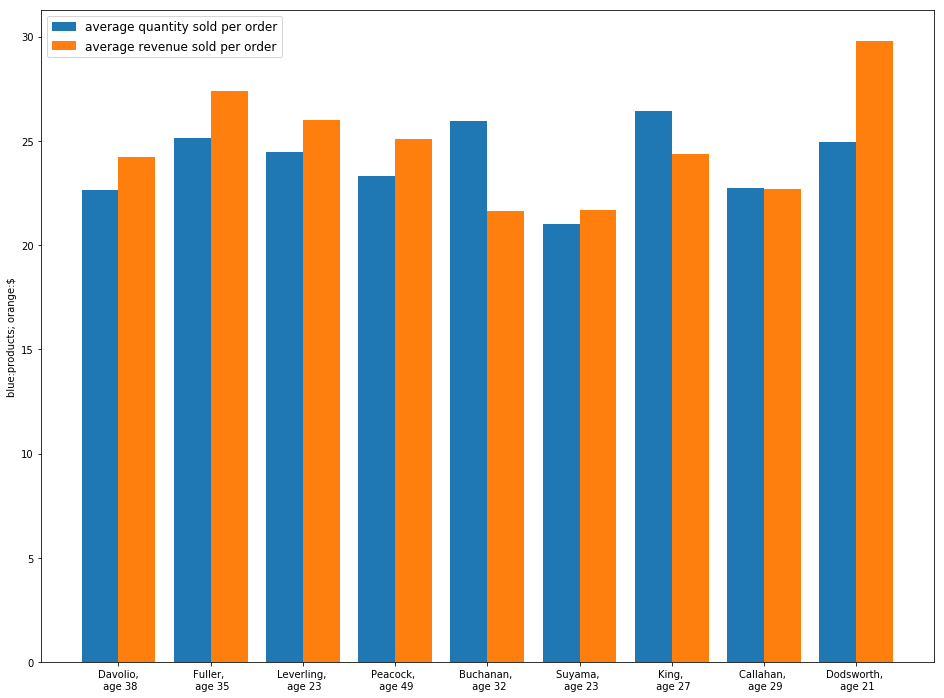

In [108]:
discounts = ['Davolio,\n age 38', 'Fuller, \n age 35','Leverling, \n age 23','Peacock, \n age 49','Buchanan, \n age 32','Suyama, \n age 23','King, \n age 27','Callahan, \n age 29','Dodsworth, \n age 21']
avg_quantity = [22.643478260869564, 25.12448132780083, 24.461059190031154, 23.32857142857143, 25.94871794871795, 20.99404761904762, 26.443181818181817, 22.74230769230769, 24.953271028037385]
avg_revenue = [24.2080304347826, 27.367740663900413, 26.011627725856677, 25.08617857142856, 21.64606837606838, 21.688425595238098, 24.372335227272732, 22.694017307692306, 29.791990654205605]
total_revenue = [189113.13375652168,165711.669719917,204243.30090342663,245794.37764285706,65717.46358974361,76495.07707440478,113428.84814772729,134189.7243403846,79544.61504672897]

ypos = np.arange(len(quantity))
plt.pyplot.figure(figsize = (16,12))
plt.pyplot.ylabel("blue:products; orange:$")


plt.pyplot.xticks(ypos,discounts)
plt.pyplot.bar(xpos-0.2,avg_quantity, width = 0.4, label='average quantity sold per order')
plt.pyplot.bar(xpos+0.2,avg_revenue,width = 0.4, label='average revenue sold per order')

plt.pyplot.legend(fontsize=12)

In [1]:
#Function
def run_twoSample_tTest(population1, population2, alpha):
    """Generates test conclusion given populaions and alpha level"""
    def get_t_statistic(pop1, pop2):
        """Calculates and returns t-statistic figure of two populations"""
        def variance(sample):
            sample_mean = np.mean(sample)
            return sum([(i - sample_mean)**2 for i in sample])
    
        def sample_variance(sample1, sample2):
            n_1, n_2 = len(sample1), len(sample2)
            var_1, var_2 = variance(sample1), variance(sample2)
            return (var_1 + var_2)/((n_1 + n_2)-2)
        
        pop1_mean, pop2_mean = np.mean(pop1), np.mean(pop2)
        samp_var = sample_variance(pop1, pop2)
        n_pop1, n_pop2 = len(pop1), len(pop2)
        t_numerator = pop1_mean - pop2_mean
        t_denominator = np.sqrt(samp_var * ((1/n_pop1)+(1/n_pop2)))
        return t_numerator / t_denominator
    
    t = get_t_statistic(population1, population2)
    p = stats.t.sf(abs(t), len(population1)+len(population2)-1) * 2
    
    if p < alpha:
        return 'reject null hypothesis'
    else:
        return 'fail to reject null hypothesis'

In [ ]:
run_twoSample_tTest(discounted_orderQuantities, non_discounted_orderQuantities, 0.05)

Text(0,0.5,'total quantity of products processed')

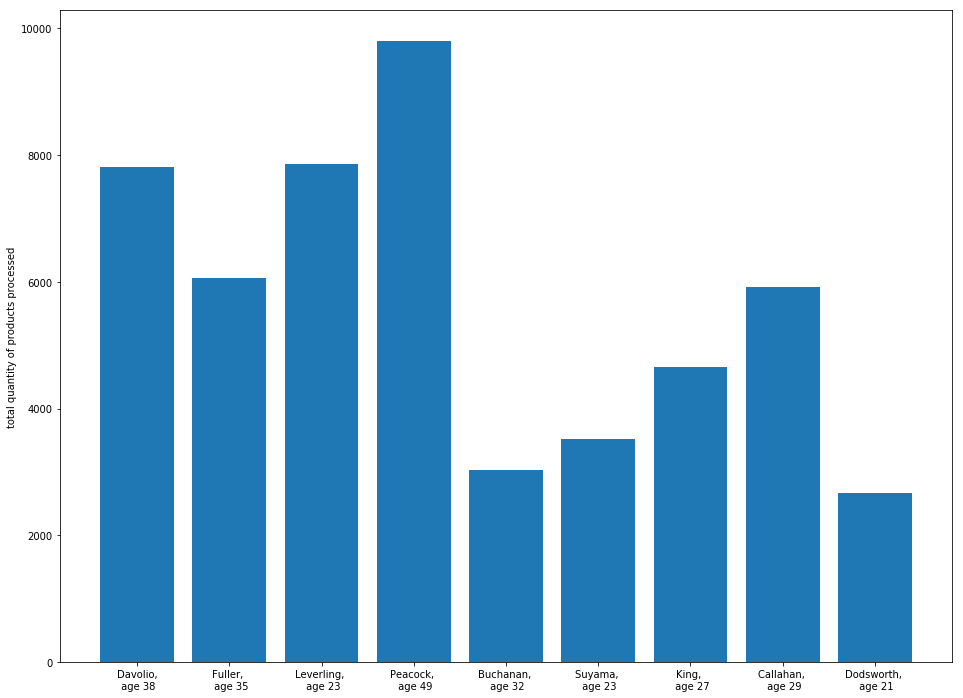

In [113]:
discounts = ['Davolio,\n age 38', 'Fuller, \n age 35','Leverling, \n age 23','Peacock, \n age 49','Buchanan, \n age 32','Suyama, \n age 23','King, \n age 27','Callahan, \n age 29','Dodsworth, \n age 21']
avg_quantity = [22.643478260869564, 25.12448132780083, 24.461059190031154, 23.32857142857143, 25.94871794871795, 20.99404761904762, 26.443181818181817, 22.74230769230769, 24.953271028037385]
total_quantity = [7812, 6055, 7852, 9798, 3036, 3527, 4654, 5913, 2670]
#avg_revenue = [24.2080304347826, 27.367740663900413, 26.011627725856677, 25.08617857142856, 21.64606837606838, 21.688425595238098, 24.372335227272732, 22.694017307692306, 29.791990654205605]
total_revenue = [189113.13375652168,165711.669719917,204243.30090342663,245794.37764285706,65717.46358974361,76495.07707440478,113428.84814772729,134189.7243403846,79544.61504672897]

ypos = np.arange(len(quantity))

plt.pyplot.figure(figsize = (16,12))
plt.pyplot.xticks(ypos,discounts)
plt.pyplot.bar(xpos,total_quantity, label='total quantity of products sold')
plt.pyplot.ylabel("total quantity of products processed")
#plt.pyplot.xlabel("Employee")
#plt.pyplot.bar(xpos+0.2,avg_revenue,width = 0.4, label='average revenue sold per order')

<BarContainer object of 6 artists>

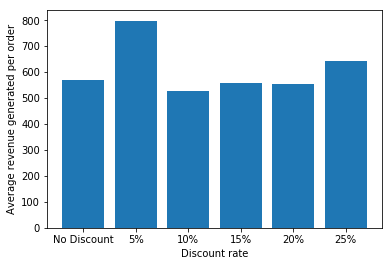

In [36]:
discounts = ['No Discount','5%','10%','15%','20%','25%']
revenue = [570.00, 797.93, 528.90, 557.36, 553.92, 642.46]

ypos = np.arange(len(discounts))
plt.pyplot.ylabel("Average revenue generated per order")
plt.pyplot.xlabel("Discount rate")
plt.pyplot.xticks(ypos,discounts)
#plt.pyplot.figure(figsize = [10,15])
plt.pyplot.bar(ypos,revenue)